In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [ ]:
image_direc = '/content/drive/MyDrive/LANES'
image_paths = glob.glob(os.path.join(image_direc, "*.png"))

In [ ]:
def process_image(image_path):
    image = Image.open(image_path)

    # Convert image to RGB array
    image_rgb = np.array(image)

    r_mean = np.mean(image_rgb[:,:,0])
    g_mean = np.mean(image_rgb[:,:,1])
    b_mean = np.mean(image_rgb[:,:,2])


    return r_mean, g_mean, b_mean

In [ ]:
from PIL import Image
import numpy as np

def match_gradation(new_image_path, target_image_means, output_path):
    r_target_mean, g_target_mean, b_target_mean= target_image_means

    new_image = Image.open(new_image_path)
    new_image_rgb = np.array(new_image)
    r_new_mean = np.mean(new_image_rgb[:,:,0])
    g_new_mean = np.mean(new_image_rgb[:,:,1])
    b_new_mean = np.mean(new_image_rgb[:,:,2])

    r_scale = r_target_mean / r_new_mean
    g_scale = g_target_mean / g_new_mean
    b_scale = b_target_mean / b_new_mean

    new_image_rgb[:,:,0] = np.clip(new_image_rgb[:,:,0] * r_scale, 0, 255)
    new_image_rgb[:,:,1] = np.clip(new_image_rgb[:,:,1] * g_scale, 0, 255)
    new_image_rgb[:,:,2] = np.clip(new_image_rgb[:,:,2] * b_scale, 0, 255)


    adjusted_image = Image.fromarray(new_image_rgb.astype('uint8'))

    if not output_path.endswith(".jpg"):
        output_path += ".jpg"

    adjusted_image.save(output_path, format='JPEG', quality=95)
    print(f"Adjusted image saved to {output_path}")

    return adjusted_image


Adjusted image saved to /content/drive/MyDrive/COLOUR_CHANGED_IMG/adjusted_image_1.jpg


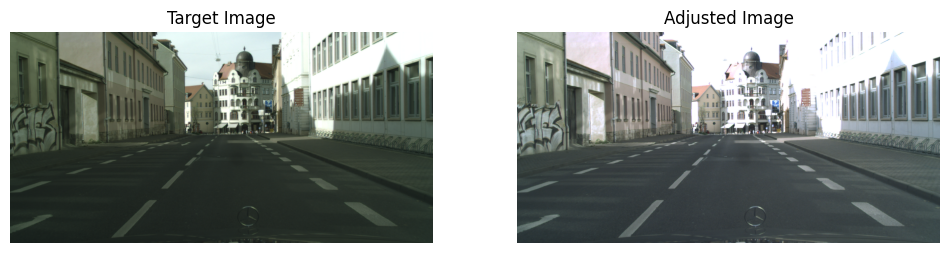

Adjusted image saved to /content/drive/MyDrive/COLOUR_CHANGED_IMG/adjusted_image_2.jpg


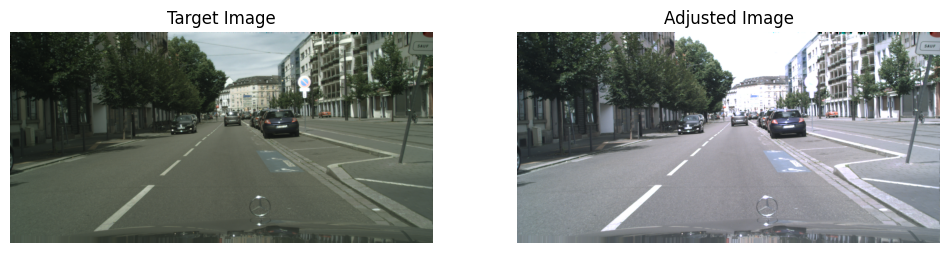

Adjusted image saved to /content/drive/MyDrive/COLOUR_CHANGED_IMG/adjusted_image_3.jpg


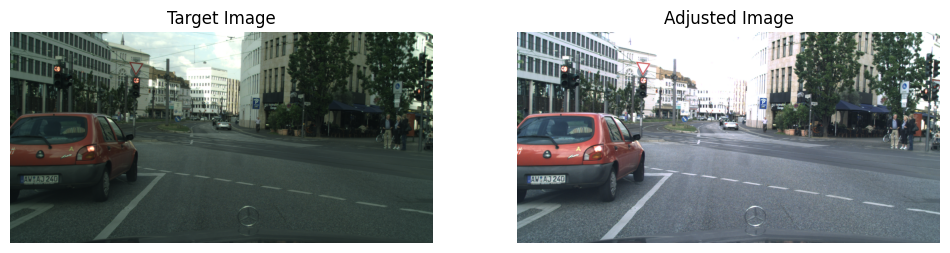

Adjusted image saved to /content/drive/MyDrive/COLOUR_CHANGED_IMG/adjusted_image_4.jpg


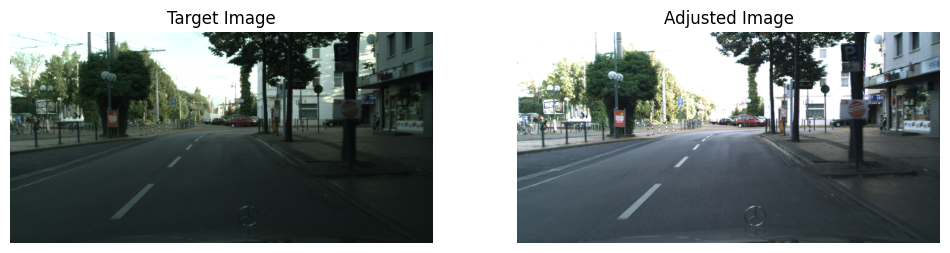

Adjusted image saved to /content/drive/MyDrive/COLOUR_CHANGED_IMG/adjusted_image_5.jpg


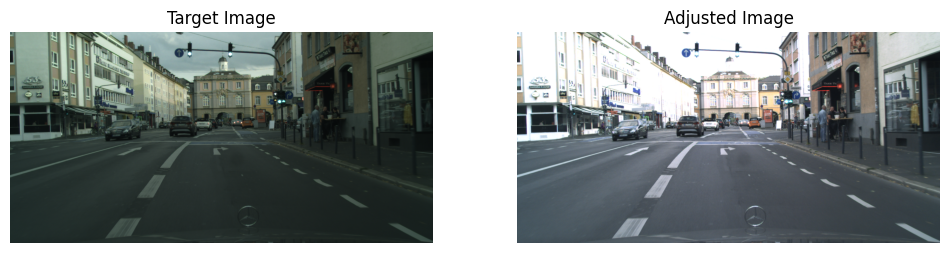

Adjusted image saved to /content/drive/MyDrive/COLOUR_CHANGED_IMG/adjusted_image_6.jpg


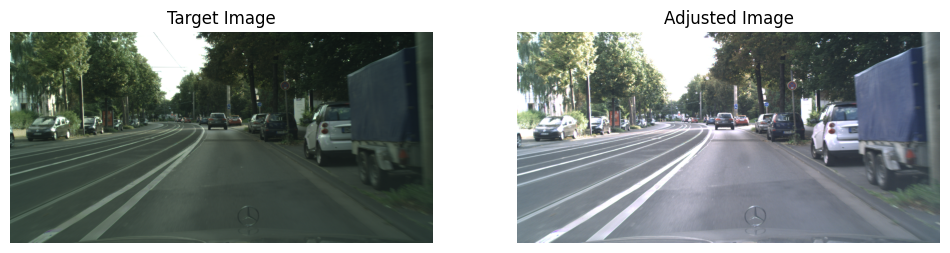

Adjusted image saved to /content/drive/MyDrive/COLOUR_CHANGED_IMG/adjusted_image_7.jpg


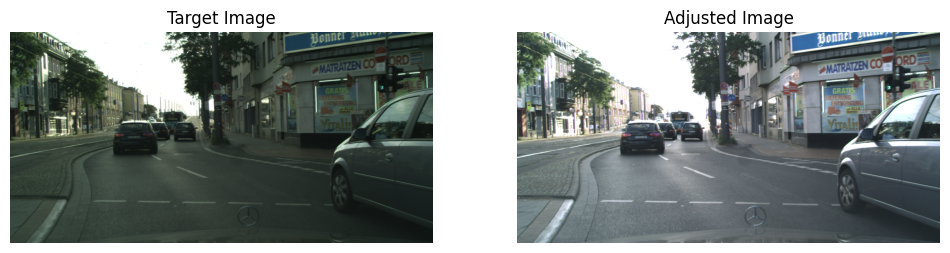

Adjusted image saved to /content/drive/MyDrive/COLOUR_CHANGED_IMG/adjusted_image_8.jpg


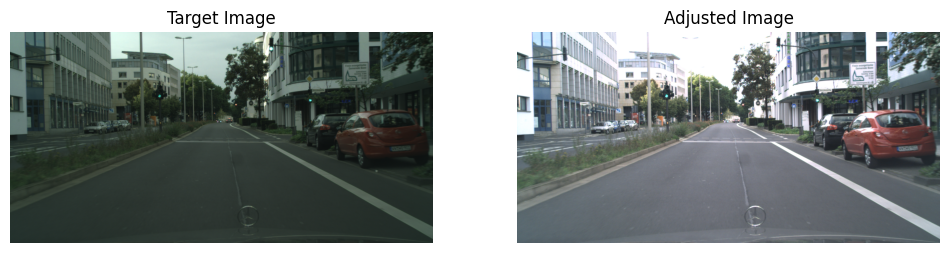

Adjusted image saved to /content/drive/MyDrive/COLOUR_CHANGED_IMG/adjusted_image_9.jpg


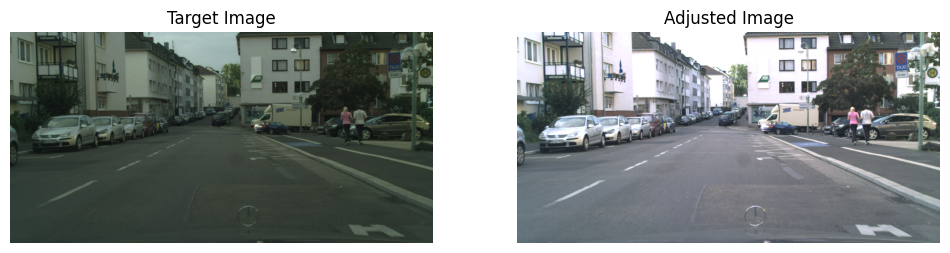

Adjusted image saved to /content/drive/MyDrive/COLOUR_CHANGED_IMG/adjusted_image_10.jpg


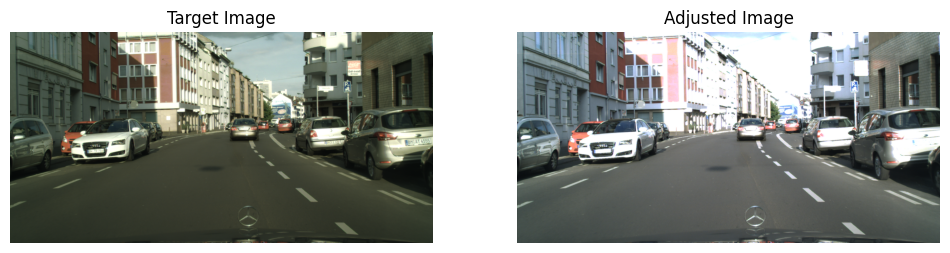

In [ ]:
for i, path in enumerate(image_paths[:10]):
  target_image_means = process_image('/content/images (2).jpeg')


  output_path = f'/content/drive/MyDrive/COLOUR_CHANGED_IMG/adjusted_image_{i+1}.jpg'

  adjusted_image = match_gradation(path, target_image_means, output_path)


  fig, axs = plt.subplots(1, 2, figsize=(12, 6))


  target_image = Image.open(path)
  axs[0].imshow(target_image)
  axs[0].set_title("Target Image")
  axs[0].axis('off')


  axs[1].imshow(adjusted_image)
  axs[1].set_title("Adjusted Image")
  axs[1].axis('off')

  plt.show()

[[[200 190 180]
  [203 193 183]
  [207 197 187]
  ...
  [168 159 150]
  [168 159 150]
  [163 154 145]]

 [[208 198 188]
  [208 198 188]
  [208 198 188]
  ...
  [168 159 150]
  [168 159 150]
  [166 157 148]]

 [[214 204 194]
  [212 202 192]
  [208 198 188]
  ...
  [167 158 149]
  [167 158 149]
  [168 159 150]]

 ...

 [[255 255 255]
  [254 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[252 255 255]
  [252 255 255]
  [252 255 255]
  ...
  [255 254 255]
  [255 254 255]
  [255 254 255]]]
Adjusted image saved to /content/drive/MyDrive/COLOUR_CHANGED_IMG.png


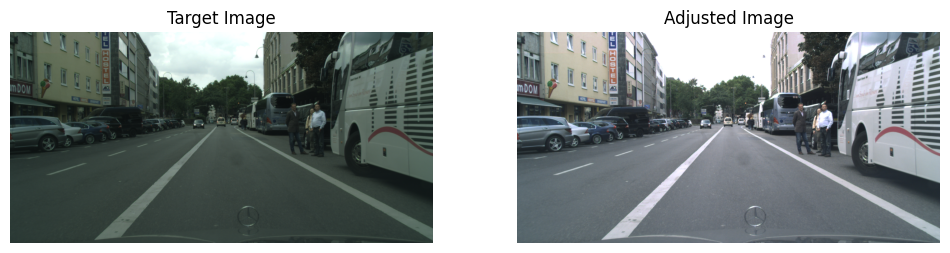

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path):
    image = Image.open(image_path)
    image_rgb = np.array(image)
    print(image_rgb)


    r_mean = np.mean(image_rgb[:,:,0])
    g_mean = np.mean(image_rgb[:,:,1])
    b_mean = np.mean(image_rgb[:,:,2])


    return r_mean, g_mean, b_mean

def match_gradation(new_image_path, target_image_means, output_path):

    r_target_mean, g_target_mean, b_target_mean = target_image_means


    new_image = Image.open(new_image_path)
    new_image_rgb = np.array(new_image)

    r_new_mean = np.mean(new_image_rgb[:,:,0])
    g_new_mean = np.mean(new_image_rgb[:,:,1])
    b_new_mean = np.mean(new_image_rgb[:,:,2])

    r_scale = r_target_mean / r_new_mean
    g_scale = g_target_mean / g_new_mean
    b_scale = b_target_mean / b_new_mean

    new_image_rgb[:,:,0] = np.clip(new_image_rgb[:,:,0] * r_scale, 0, 255)
    new_image_rgb[:,:,1] = np.clip(new_image_rgb[:,:,1] * g_scale, 0, 255)
    new_image_rgb[:,:,2] = np.clip(new_image_rgb[:,:,2] * b_scale, 0, 255)


    adjusted_image = Image.fromarray(new_image_rgb.astype('uint8'))


    output_path = output_path + ".png"
    adjusted_image.save(output_path)
    print(f"Adjusted image saved to {output_path}")

    return adjusted_image

target_image_means = process_image('/content/images (2).jpeg')
adjusted_image = match_gradation('/content/cologne_000136_000019_leftImg8bit.png', target_image_means, '/content/drive/MyDrive/COLOUR_CHANGED_IMG')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))


target_image = Image.open('/content/cologne_000136_000019_leftImg8bit.png')
axs[0].imshow(target_image)
axs[0].set_title("Target Image")
axs[0].axis('off')


axs[1].imshow(adjusted_image)
axs[1].set_title("Adjusted Image")
axs[1].axis('off')

plt.show()